<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Part-5:-Analyse-the-results-of-the-LDA-model" data-toc-modified-id="Part-5:-Analyse-the-results-of-the-LDA-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 5: Analyse the results of the LDA model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-the-dataframes-containing-the-details-of-all-the-speeches" data-toc-modified-id="Load-the-dataframes-containing-the-details-of-all-the-speeches-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Load the dataframes containing the details of all the speeches</a></span></li></ul></li><li><span><a href="#Let's-save-a-few-sample-speeches-along-with-topics-detected" data-toc-modified-id="Let's-save-a-few-sample-speeches-along-with-topics-detected-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Let's save a few sample speeches along with topics detected</a></span></li><li><span><a href="#Let's-see-which-topics-have-the-most-words-associated-with-them" data-toc-modified-id="Let's-see-which-topics-have-the-most-words-associated-with-them-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Let's see which topics have the most words associated with them</a></span><ul class="toc-item"><li><span><a href="#Select-only-the-topics-that-are-interesting-to-us" data-toc-modified-id="Select-only-the-topics-that-are-interesting-to-us-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Select only the topics that are interesting to us</a></span></li><li><span><a href="#Sum-up-the-total-number-of-words-an-MP-has-said-about-a-topic" data-toc-modified-id="Sum-up-the-total-number-of-words-an-MP-has-said-about-a-topic-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Sum up the total number of words an MP has said about a topic</a></span></li><li><span><a href="#Now-normalise-words-for-each-MP-and-topic-by-the-total-number-of-words-the-MP-has-spoken-(ignoring-stop-words,-etc)" data-toc-modified-id="Now-normalise-words-for-each-MP-and-topic-by-the-total-number-of-words-the-MP-has-spoken-(ignoring-stop-words,-etc)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Now normalise words for each MP and topic by the total number of words the MP has spoken (ignoring stop words, etc)</a></span></li></ul></li></ul></li><li><span><a href="#How-are-topics-segregated-by-gender?" data-toc-modified-id="How-are-topics-segregated-by-gender?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How are topics segregated by gender?</a></span><ul class="toc-item"><li><span><a href="#All-parties" data-toc-modified-id="All-parties-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>All parties</a></span></li><li><span><a href="#Conservative-MPs" data-toc-modified-id="Conservative-MPs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Conservative MPs</a></span></li><li><span><a href="#Labour-MPs" data-toc-modified-id="Labour-MPs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Labour MPs</a></span></li></ul></li><li><span><a href="#Total-words-spoken-by-each-gender-over-time" data-toc-modified-id="Total-words-spoken-by-each-gender-over-time-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Total words spoken by each gender over time</a></span></li><li><span><a href="#Get-number-of-BBC-Question-Time-appearances" data-toc-modified-id="Get-number-of-BBC-Question-Time-appearances-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get number of BBC Question Time appearances</a></span></li></ul></div>

# Analyse all house of commons speeches since 1970

[Part 1: Get a list of MPs and their affiliations](MP_speeches-Part1.ipynb)

[Part 2: Download all speeches belonging to MPs in list](MP_speeches-Part2.ipynb)

[Part 3: Train bigram and trigram models and use them on all speeches](MP_speeches-Part3.ipynb)

[Part 4: Train an LDA topic model and process all speeches with it](MP_speeches-Part4.ipynb)

## Part 5: Analyse the results of the LDA model

In this notebook, we will use the LDA topic model we created previously to understand broader trends in parliamentary speeches. You can see more details of the topic model in [Part 4](MP_speeches-Part4.ipynb).

In [1]:
import pandas as pd
import numpy as np
# bcolz is used to store the speeches
import bcolz

# Read in details of MPs
mps = pd.read_hdf("list_of_mps.h5", "mps")

Let's start by importing the names of topics in the LDA model.

These topics are stored in `topic_names.py`.

In [3]:
# %load topic_names.py
# Dictionary of topic names. Uncomment above line to reload them.
topic_names_100 = {
    0: "business",
    3: "immigration",
    4: "counter terrorism",
    5: "syria",
    6: "private housing",
    7: "banking",
    9: "tribunal",
    18: "bbc",
    19: "police force",
    20: "parliamentary terms",
    21: "secretary of state terms",
    23: "local authority",
    25: "domestic violence",
    26: "airport and rail expansion",
    27: "scotland",
    29: "parliamentary terms+",
    30: "wales",
    32: "drugs and alcohol",
    33: "middle east",
    35: "care quality commission",
    36: "speaker of the house",
    39: "nhs",
    41: "farming",
    42: "law",
    43: "development & climate change",
    44: "fishing industry",
    45: "inquiries & reports",
    46: "northern ireland",
    47: "construction",
    49: "animal welfare",
    60: "fraud terminology",
    62: "legislation",
    63: "bill terminology",
    64: "regional stuff",
    65: "elections",
    68: "local services",
    69: "energy",
    70: "welfare reforms",
    71: "european union",
    72: "education",
    73: "money-related terms",
    74: "pensioner income",
    76: "child poverty",
    78: "sports & culture",
    79: "investment",
    84: "armed forces",
    85: "economy",
    86: "house of lords",
    87: "employee's rights",
    92: "nuclear weapons",
    95: "parliamentary terms++",
    99: "child care"
}

def topic_dict(topic_number):
    """
    return name of topic where identified
    """
    
    try:
        return topic_names_100[topic_number]
    except KeyError:
        return topic_number
    
# Reverse the topic names so that we can find them easily
reverse_topic_dict = {i[1]:i[0] for i in topic_names_100.items()}

#### Load the dataframes containing the details of all the speeches

[Part 4](MP_speeches-Part4.ipynb) contains the methodology used to calculate these values.

In [4]:
# Import speeches data (excludes speech texts)
speeches = pd.read_hdf("speeches.h5", "speeches")

# Import pointers to speech texts. This doesn't actually load the speeches into memory but
# instead makes it easy to access them when required. This array is ordered exactly the same
# as the above speeches dataframe

zspeeches = bcolz.open("/media/Stuff/speeches.bcolz", mode="w")

Here's what the speeches dataframe looks like.

Each column with a number refers to a particular topic. Each cell contains the probability that the speech is about that particular topic.

In [5]:
speeches.head()

date                                       debate_title  mp_id  \
0 1983-01-24  Oral Answers to Questions &#8212; Trade: Video...  10574   
1 1983-01-24  Oral Answers to Questions &#8212; Trade: Merch...  21914   
2 1983-01-24  Oral Answers to Questions &#8212; Trade: Adver...  21960   
3 1983-01-24  Oral Answers to Questions &#8212; Trade: Packa...  21960   
4 1983-01-24  Oral Answers to Questions &#8212; Trade: Video...  21960   

         mp_name  n_words section_id         0    1    2    3 ...    90   91  \
0     Jack Straw     27.0   16624762  0.000000  0.0  0.0  0.0 ...   0.0  0.0   
1  James Johnson     36.0   16624762  0.000000  0.0  0.0  0.0 ...   0.0  0.0   
2    John Fraser     39.0   16624762  0.000000  0.0  0.0  0.0 ...   0.0  0.0   
3    John Fraser     13.0   16624762  0.251425  0.0  0.0  0.0 ...   0.0  0.0   
4    John Fraser     23.0   16624762  0.000000  0.0  0.0  0.0 ...   0.0  0.0   

    92   93   94   95   96   97   98   99  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 106 columns]

In [6]:
# Some helper functions
def topics_by_mp(mp_id):
    """Return a histogram of topics mentioned by MP"""
    mp_speeches = speeches[(speeches["date"] > "1970-06-18") &
                       (speeches["n_words"] > 5) &
                       (speeches["mp_id"] == mp_id)]
    mp_speeches = pd.melt(mp_speeches, value_vars=list(topic_names_100.keys())).query('value > 0.4').groupby("variable").size()
    return mp_speeches
    

def topics_by_mp_words(mp_id):
    """Return a histogram of topics mentioned by MP"""
    mp_speeches = speeches[(speeches["date"] > "1970-06-18") &
                       (speeches["mp_id"] == mp_id)]
    mp_speeches[list(topic_names_100.keys())] = mp_speeches[list(topic_names_100.keys())].mul(mp_speeches["n_words"],
                                                                                              axis=0)
    mp_speeches = mp_speeches[list(topic_names_100.keys())].sum().sort_values(ascending=False).reset_index()
    mp_speeches["topic_name"] = mp_speeches["index"].apply(lambda x: topic_dict(x))
    mp_speeches = mp_speeches.set_index("index").rename(columns={0:"num_words"})
    return mp_speeches

### Let's save a few sample speeches along with topics detected

In [6]:
b = speeches\
    .pipe(lambda df: df[df.mp_name.isin(["Margaret Thatcher", "Caroline Lucas", "Jeremy Corbyn", "Tony Benn"])])\
    .query('n_words < 100 & n_words > 20')\
    .groupby("mp_name")\
    .apply(lambda x: x.sample(n=20))\
    .drop(["mp_name", "n_words", "section_id"], axis=1)\
    .reset_index("mp_name")

b = b.fillna(0)
b.mp_id = b.mp_id.astype(int)
b = b.join(mps[["is_female"]], on="mp_id")
b[list(range(100))] = np.log10(b[list(range(100))])

b = b.rename(columns=lambda x: topic_dict(x))\
    [["mp_name", "body", "date", "debate_title", "mp_id", "is_female"] + list(topic_names_100.values())]\

def collapse_topics(speech_row):
    new_row = speech_row[["mp_name", "body", "date", "debate_title", "mp_id", "is_female"]]
    new_row["topics"] = speech_row[list(topic_names_100.values())].sort_values(ascending=False).loc[lambda x: x > 0.05].to_dict()
    return new_row

b.sort_values("mp_name")\
.apply(collapse_topics, axis=1)\
.assign(date=lambda x: pd.to_datetime(x.date))\
.to_json("speech_samples.json", orient="records", double_precision=2)

ValueError: fill value must be in categories

### Let's see which topics have the most words associated with them

In [7]:
import cufflinks
import plotly

cufflinks.set_config_file(theme="ggplot")
# Plot most popular topics discussed
# list(topic_names_100.keys())
a = speeches[list(range(100))].mul(speeches["n_words"], axis=0).sum().sort_values(ascending=False).reset_index()
a["index"] = a["index"].apply(lambda x: "-" + str(topic_dict(x)) + "-")
a.set_index("index")[0].iplot(kind="bar",
                              xTitle="<b>Topic</b>",
                              yTitle="<b>Number of words</b>",
                              title="Total number of words assigned to each topic",
                              margin=(100,50,150,50))

/home/durand/Stuff/Sources/anaconda3/envs/nlp/lib/python3.6/site-packages/cufflinks/plotlytools.py:156: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp



In [9]:
topic_id = reverse_topic_dict["legislation"]
a = speeches[speeches[topic_id] > 0.7][["n_words", "mp_name", "debate_title", topic_id]].sort_values(topic_id, ascending=False)
a["n_topic_words"] = a["n_words"] * a[topic_id]
speech_index = a.sort_values("n_topic_words", ascending=False).query("n_topic_words > 50").sort_values("n_words", ascending=False).sample(1).index[0]
print(speeches.iloc[speech_index][["date", "debate_title", "mp_name"]], "\n\n", zspeeches[speech_index])

date                                          2010-12-01 00:00:00
debate_title    Public Libraries and Museums Act 1964 (Amendme...
mp_name                                           Jacob Rees-Mogg
Name: 1067488, dtype: object 

 I would like to clarify that the judicial review case brought by my noble kinsman was not in any way to challenge what had happened in this House. It was to challenge the use by Ministers of the royal prerogative, which is why the judicial review was allowed by the courts. I cannot think of an example of such a position since the reign of Queen Victoria, who refused to accept Robert Peel as Prime Minister, and I think it inconceivable that it would arise in a modern constitution. I think that that is extraordinarily unlikely. It is theoretically possible that the Queen could refuse assent to a Bill, but that has not happened since the reign of Queen Anne. Such constitutional anomalies remain theoretical, but so theoretical that it is inconceivable that they wo

#### Select only the topics that are interesting to us

In [12]:
# List of specific topics to index for graphing
topics_to_graph = ["european union", "pensioner income", "nhs",
                   "welfare reforms", "education", "investment", "construction",
                   "middle east", "private housing", "armed forces", "domestic violence",
                   "economy", "child care", "energy"]

#### Sum up the total number of words an MP has said about a topic

In [13]:
def get_mp_topic_fraction(df):
    # Mutates speech data frame from wide to long format with a row for each speech's topic probability
    # then sums up by topic
    return df.melt(id_vars=["mp_name", "mp_id", "date", "n_words"],
          value_vars=list(range(100)), var_name="topic_id")\
    .assign(n_topic_words = lambda x: x.n_words*x.value)\
    .groupby(["topic_id"])\
    ["n_topic_words"].sum()

mp_topics = speeches.groupby("mp_id").apply(get_mp_topic_fraction)

In [14]:
mp_topics.head()

topic_id           0           1           2             3            4   \
mp_id                                                                      
10001      606.040894   68.012230   93.949776  12799.969727  1966.180908   
10003       55.393047    0.000000    0.000000     53.854893    13.113302   
10004      350.941895  179.387009  239.931030     86.814644   155.384933   
10005      532.477539    2.152678  127.648796    626.501038  3444.897461   
10007     1471.802734   24.965967  118.897850   2234.729492  2157.677979   

topic_id          5            6            7           8           9   \
mp_id                                                                    
10001     148.762177  4906.706543  4890.042969   86.754906  586.366394   
10003       8.403986   416.161957   154.171204   11.579290   87.218269   
10004       4.243080   472.930603   532.420654  124.503235  863.380615   
10005      33.941597  2030.038208   352.784271   76.964432  446.869598   
10007      16.157419  1017.048889   230.574554   24.993299  514.868652   

topic_id     ...               90          91          92          93  \
mp_id        ...                                                        
10001        ...       372.421906  427.828522  345.838684  124.775810   
10003        ...         3.232471   73.018089    7.507860   23.297886   
10004        ...        53.083733  185.640137  102.344917   33.647354   
10005        ...        43.362213  324.590637  244.432968   41.547585   
10007        ...        53.417278  109.360863   60.865978   23.609921   

topic_id          94           95          96          97          98  \
mp_id                                                                   
10001     281.016296  7006.410645  484.474304  136.612076  513.566833   
10003       0.000000   267.444794    7.318209   44.784664  130.233215   
10004      26.366482  1123.713745  122.093803   89.263954  271.707031   
10005      13.429977  4970.034668   61.520683  103.757118  198.088928   
10007      15.706094  2544.728760   75.783646   26.529221  686.751282   

topic_id           99  
mp_id                  
10001     4637.449707  
10003      376.652802  
10004      252.708557  
10005      413.638733  
10007      443.039612  

[5 rows x 100 columns]

#### Now normalise words for each MP and topic by the total number of words the MP has spoken (ignoring stop words, etc)

In [15]:
# This gives us the fraction of time MP spent on a particular subject
normalised_mp_topics = mp_topics.div(mp_topics.sum(axis=1), axis=0)

normalised_mp_topics.head()

topic_id        0         1         2         3         4         5   \
mp_id                                                                  
10001     0.004007  0.000450  0.000621  0.084631  0.013000  0.000984   
10003     0.004925  0.000000  0.000000  0.004788  0.001166  0.000747   
10004     0.004972  0.002541  0.003399  0.001230  0.002201  0.000060   
10005     0.004327  0.000017  0.001037  0.005091  0.027994  0.000276   
10007     0.022328  0.000379  0.001804  0.033902  0.032733  0.000245   

topic_id        6         7         8         9     ...           90  \
mp_id                                               ...                
10001     0.032442  0.032332  0.000574  0.003877    ...     0.002462   
10003     0.037003  0.013708  0.001030  0.007755    ...     0.000287   
10004     0.006700  0.007543  0.001764  0.012232    ...     0.000752   
10005     0.016496  0.002867  0.000625  0.003631    ...     0.000352   
10007     0.015429  0.003498  0.000379  0.007811    ...     0.000810   

topic_id        91        92        93        94        95        96  \
mp_id                                                                  
10001     0.002829  0.002287  0.000825  0.001858  0.046325  0.003203   
10003     0.006492  0.000668  0.002072  0.000000  0.023780  0.000651   
10004     0.002630  0.001450  0.000477  0.000374  0.015920  0.001730   
10005     0.002638  0.001986  0.000338  0.000109  0.040387  0.000500   
10007     0.001659  0.000923  0.000358  0.000238  0.038605  0.001150   

topic_id        97        98        99  
mp_id                                   
10001     0.000903  0.003396  0.030662  
10003     0.003982  0.011580  0.033490  
10004     0.001265  0.003849  0.003580  
10005     0.000843  0.001610  0.003361  
10007     0.000402  0.010418  0.006721  

[5 rows x 100 columns]

In [16]:
# These are the labeled topics
list(topic_names_100.values())

['business',
 'immigration',
 'counter terrorism',
 'syria',
 'private housing',
 'banking',
 'tribunal',
 'bbc',
 'police force',
 'parliamentary terms',
 'secretary of state terms',
 'local authority',
 'domestic violence',
 'airport and rail expansion',
 'scotland',
 'parliamentary terms+',
 'wales',
 'drugs and alcohol',
 'middle east',
 'care quality commission',
 'speaker of the house',
 'nhs',
 'farming',
 'law',
 'development & climate change',
 'fishing industry',
 'inquiries & reports',
 'northern ireland',
 'construction',
 'animal welfare',
 'fraud terminology',
 'legislation',
 'bill terminology',
 'regional stuff',
 'elections',
 'local services',
 'energy',
 'welfare reforms',
 'european union',
 'education',
 'money-related terms',
 'pensioner income',
 'child poverty',
 'sports & culture',
 'investment',
 'armed forces',
 'economy',
 'house of lords',
 "employee's rights",
 'nuclear weapons',
 'parliamentary terms++',
 'child care']

In [17]:
# Select just a few topics
topics_to_save = [reverse_topic_dict[topic] for topic in ["business", "immigration", "counter terrorism", "private housing", "banking", "police force",
                  "local authority", "domestic violence", "airport and rail expansion", "scotland", "drugs and alcohol",
                  "middle east", "nhs", "farming", "development & climate change", "fishing industry", "armed forces", "wales",
                 "animal welfare", "energy", "european union", "welfare reforms", "education", "pensioner income", "child poverty", "economy",
                 "northern ireland", "child care", "nuclear weapons", "local services", "employee's rights", "elections", "parliamentary terms"]]

In [18]:
normalised_mp_topics[reverse_topic_dict["parliamentary terms"]] = normalised_mp_topics[reverse_topic_dict["parliamentary terms"]] + normalised_mp_topics[reverse_topic_dict["parliamentary terms+"]] + normalised_mp_topics[reverse_topic_dict["parliamentary terms++"]]

normalised_mp_topics[reverse_topic_dict["nhs"]] = normalised_mp_topics[reverse_topic_dict["nhs"]] + normalised_mp_topics[reverse_topic_dict["care quality commission"]]

In [19]:
renamed_columns = {"parliamentary terms":"parliamentary terminology",
                     "nhs":"nhs & social care",
                    "employee's rights":"workers rights",
                    "airport and rail expansion":"airport & rail expansion",
                    "counter terrorism":"counter-terrorism"}

In [20]:
a = normalised_mp_topics\
    .reset_index()\
    .fillna(0)\
    .join(mps[["full_name", "Party", "is_female"]], on="mp_id")

a = a[topics_to_save + ["is_female"]].groupby("is_female")\
    .median()\
    .rename(columns=topic_names_100)\
    .rename(columns=renamed_columns)\
    .T.rename(columns={False:"male", True:"female"})
    
a.index.names = ["topic"]
a.columns.name = ""

# Use log scale to compress numbers
a = np.log10(a)

# Save to csv for viz
a.to_csv("topic_medians.csv", float_format="%.3f")

In [21]:
a.head()

male    female
topic                                
business          -2.201471 -2.052784
immigration       -2.215913 -2.059892
counter-terrorism -2.665152 -2.461162
private housing   -1.804920 -1.693292
banking           -2.132214 -2.315455

In [22]:
a = normalised_mp_topics\
    .reset_index()\
    .fillna(0)\
    .join(mps[["full_name", "Constituency", "Party", "is_female"]], on="mp_id")

# Sort topics by gender polarisation
# Only use topics that have names assigned
topic_sorter = list(a[topics_to_save + ["is_female"]]\
                    .groupby("is_female")\
                    .median()\
                    .diff()\
                    .iloc[1]\
                    .sort_values(ascending=False)\
                    .index)
# Convert values to log10 to store higher precision with less data
a[list(range(100))] = np.log10(a[list(range(100))])

a = a.rename(columns={"mp_id":"id"})
a.is_female = a.is_female.astype(int)
a = a[a.Party.isin(["Labour", "Conservative", "Liberal Democrat", "Scottish National Party", "Green", 'Plaid Cymru',
       'Labour/Co-operative', "UKIP", "Green", "Alliance", "DUP", "UUP", "SDP", "Social Democratic and Labour Party", "Liberal Party"])]\
    [["id", "full_name", "Constituency", "Party", "is_female"] + topic_sorter]\
    .rename(columns=topic_names_100)\
    .rename(columns=renamed_columns)\
    .sort_values(["Party", "is_female"])
# Abbreviate parties
a["Party"] = a["Party"].apply(lambda x: {"Conservative":"Con", "Labour": "Lab", "Scottish National Party": "SNP",
                                         "Liberal Democrat":"LD", "Labour/Co-operative":"Lab", "UKIP":"UKIP", "Green":"Green",
                                         "Alliance":"Alliance","DUP":"DUP", "UUP":"UUP", "SDP":"SDP",
                                         "Social Democratic and Labour Party":"Social Democratic and Labour Party",
                                        "Liberal Party":"LD", "Plaid Cymru":"PC"}[x])
a.to_csv("mp_topic_fraction.csv", index=False, float_format="%.3f")

/home/durand/Stuff/Sources/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning:

divide by zero encountered in log10



In [21]:
tidy_topics = normalised_mp_topics\
    .reset_index()\
    .fillna(0)\
    .melt(id_vars="mp_id", value_vars=list(mp_topics.columns))\
    .join(mps, on="mp_id")
tidy_topics["topic_name"] = list(map(topic_dict, tidy_topics["topic_id"]))

In [22]:
tidy_topics["topic_id"] = tidy_topics["topic_id"].astype("category")
# Sort descending order of topic popularity
topic_sorter = list(mp_topics.sum(axis=0).sort_values(ascending=False).index)

# Alternatively, sort by topic gender polarisation
b = tidy_topics.groupby(["topic_id", "is_female"])[["value"]].median().reset_index()\
    .pivot(index="topic_id", columns="is_female", values="value")
topic_sorter = list((b[True] - b[False]).sort_values(ascending=False).index)
tidy_topics["topic_id"].cat.set_categories(topic_sorter, inplace=True)

/home/durand/Stuff/Sources/anaconda3/envs/nlp/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/home/durand/Stuff/Sources/anaconda3/envs/nlp/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/home/durand/Stuff/Sources/anaconda3/envs/nlp/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



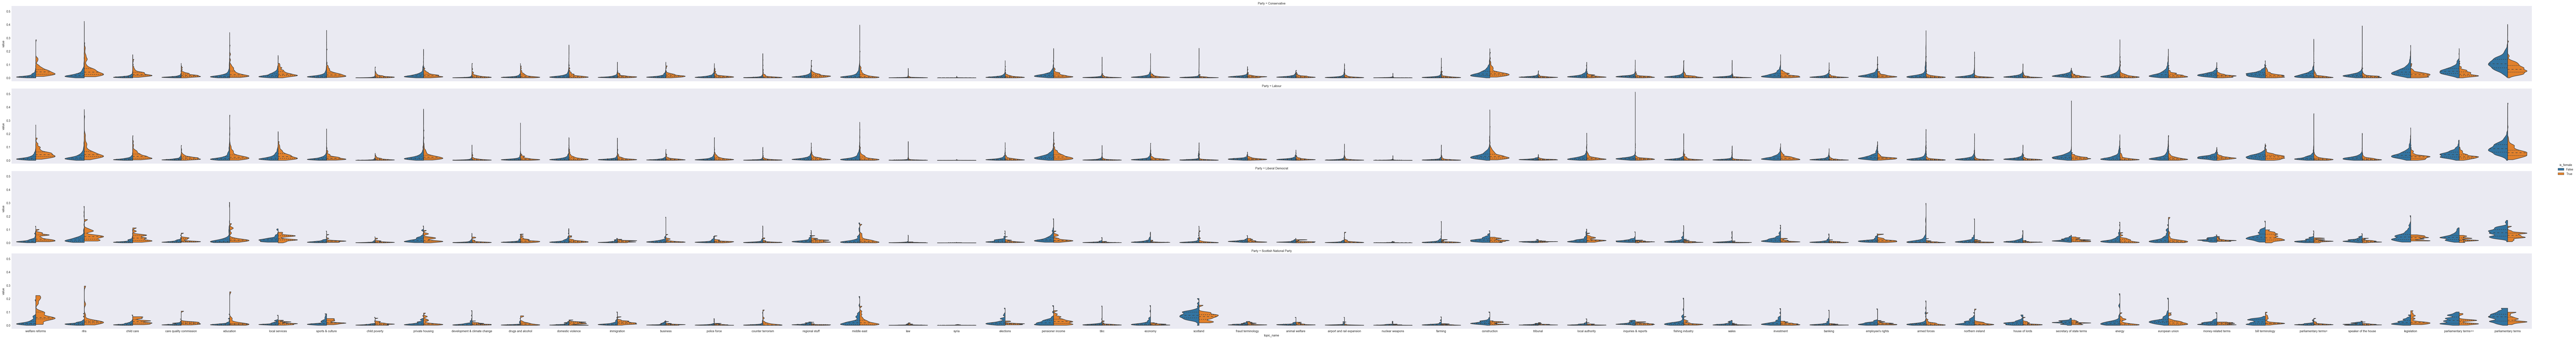

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("dark")
matplotlib.rcParams['figure.figsize'] = [12., 4.]
matplotlib.rcParams['figure.dpi'] = 100

factorplot = sns.factorplot(y="value", x="topic_name",
               hue="is_female", split=True,
               scale="width", gridsize=1000,
               kind="violin", row="Party", cut=0.,
               bw=0.2, inner="quartile", aspect=30,
               data=tidy_topics[tidy_topics.Party.isin(["Labour", "Conservative", "Liberal Democrat", "Scottish National Party"])
                                & tidy_topics.topic_name.isin(reverse_topic_dict.keys())
                               ].sort_values(["topic_id"])
    [["topic_id", "topic_name", "value", "full_name", "is_female", "Party"]])


In [24]:
from IPython.display import IFrame
IFrame(src="violin_plot.html", width=1500, height=2000)

In [25]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(normalised_mp_topics)

In [26]:
from sklearn.manifold import TSNE, MDS
from MulticoreTSNE import MulticoreTSNE as TSNE # Install from https://github.com/DmitryUlyanov/Multicore-TSNE
import plotly.plotly as py
import plotly
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, n_jobs=8)
#tsne = MDS()
tsne_lda = tsne.fit_transform(normalised_mp_topics)

In [27]:
# Create Dataframe from tsne data
df = pd.DataFrame(tsne_lda).assign(mp=pd.to_numeric(list(normalised_mp_topics.index)))
df.columns = ["x", "y", "mp"]

# Join dataframe with mp info
df = df.join(mps[["is_female", "Party", "full_name"]], on="mp").assign(is_female = lambda x: np.where(x.is_female.fillna(False), "Female", "Male"))

plotly.offline.iplot({
        "data": [
            {"x": list(df_group[1].x),
            "y": list(df_group[1].y),
            "text": list(df_group[1].full_name),
             "name": df_group[0],
             "mode": "markers"
            }
            for df_group in df.groupby("is_female")
        ]
    })

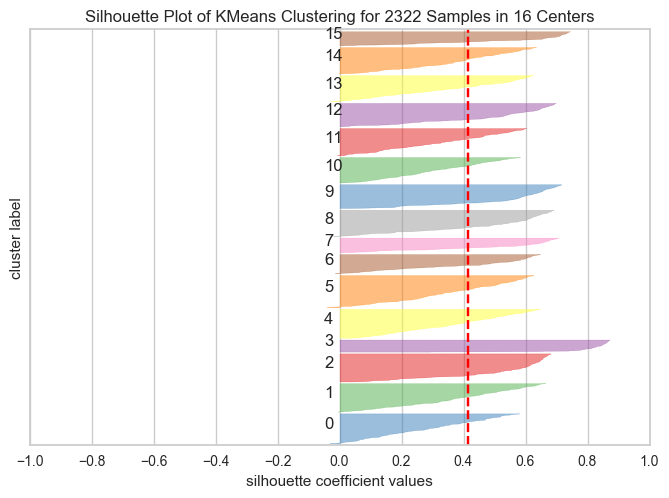

In [28]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
model = SilhouetteVisualizer(KMeans(n_clusters=16))
#model = KElbowVisualizer(KMeans(), k=20)
model.fit(tsne_lda)
model.poof()

clusterer = KMeans(n_clusters=8)

cluster_labels = clusterer.fit_predict(tsne_lda)#normalised_mp_topics.fillna(0))

In [29]:
# Update the tooltip chart
hovered_symbol = ''
def hover_handler(self, content):
    global hovered_symbol
    symbol = content.get('data', '')
    if symbol != hovered_symbol:
        hovered_symbol = symbol["index"]
        bars.y=list(normalised_mp_topics.loc[df.iloc[hovered_symbol].mp].fillna(0))
        bar_figure.title = "{0} ({1})".format(df.iloc[hovered_symbol].full_name, df.iloc[hovered_symbol].Party)

def bar_hover_handler(self, content):
    print(content)
    hovered_topic = content.get("data", '')["x"]
    textbox.value = (speeches[(speeches["mp_id"] == df.iloc[hovered_symbol].mp) &
                           (speeches[reverse_topic_dict[hovered_topic]] > 0.4) &
                           (speeches["n_words"] > 0)].sample(n=1).body.iloc[0])

In [30]:
import bqplot as bq
import ipywidgets as ipyw
import numpy as np


bar_x_sc = bq.OrdinalScale()
bar_y_sc = bq.LinearScale(min=0, max=1)

bar_ax_x = bq.Axis(scale=bar_x_sc, tick_values=list(normalised_mp_topics.iloc[0].reset_index().topic_id))
bar_ax_y = bq.Axis(scale=bar_y_sc, orientation='vertical', side='left')

bars = bq.Bars(x=list(normalised_mp_topics.iloc[0].fillna(0).reset_index().topic_id),
       scales={'x':bar_x_sc,
              'y':bar_y_sc},
              tooltip=bq.Tooltip(fields=['x']))

bars.on_hover(bar_hover_handler)
bar_figure = bq.Figure(marks=[bars],
              axes=[bar_ax_x, bar_ax_y])

x_sc = bq.LinearScale()
y_sc = bq.LinearScale()
c_sc = bq.OrdinalColorScale(domain=list(np.unique(cluster_labels)), colors=bq.CATEGORY10[:len(np.unique(cluster_labels))])
#c_sc = bq.OrdinalColorScale(domain=df.party.unique().tolist(), colors=bq.CATEGORY10[:len(df.party.unique())])

ax_x = bq.Axis(scale=x_sc)
ax_y = bq.Axis( scale=y_sc, orientation='vertical')
tooltip = bq.Tooltip(fields=['x','y', 'name'] )
scatter = bq.Scatter(x=list(df.x), unique=list(df.mp),
             y=list(df.y),
                  names=list(df.full_name), display_names=False,
             scales={'x': x_sc, 'y': y_sc, 'color':c_sc},
                     color=list(cluster_labels), tooltip=tooltip)#color=list(df.party),

fig = bq.Figure(axes=[ax_x, ax_y], marks=[scatter])

textbox = ipyw.Textarea()
viz = ipyw.VBox([ipyw.Box([fig, bar_figure]), textbox])
scatter.on_hover(hover_handler)
viz


Widget Javascript not detected.  It may not be installed or enabled properly.


In [31]:
topics_time = speeches[list(range(100))].mul(speeches["n_words"], axis=0)
topics_time.columns = list(map(topic_dict, range(100)))

topics_time["date"] = speeches["date"]
#topics_time = topics_time.query('date > "2010-05-05"')
topics_time.set_index("date", inplace=True)

In [32]:
a = topics_time.reset_index().melt(id_vars="date")
a["is_filler"] = a["variable"].isin(["parliamentary terms","parliamentary terms+","parliamentary terms++", "bill terminology", "speaker of the house", "secretary of state terms", ])

In [105]:
topics_time = a.groupby(["date", "is_filler"]).sum().reset_index("is_filler")

In [106]:
topics_time = topics_time.pivot(columns="is_filler")

In [107]:
import cufflinks

In [108]:
topics_time.resample("A").sum().div(topics_time.resample("A").sum().sum(axis=1), axis=0).iplot(kind="bar", barmode="stack")

## How are topics segregated by gender?

In [33]:
clustered_mps = normalised_mp_topics.reset_index()
clustered_mps["cluster"] = cluster_labels
clustered_mps["gender"] = df["is_female"]

In [34]:
clustered_mps

topic_id  mp_id         0         1         2         3         4         5  \
0         10001  0.004007  0.000450  0.000621  0.084631  0.013000  0.000984   
1         10003  0.004925  0.000000  0.000000  0.004788  0.001166  0.000747   
2         10004  0.004972  0.002541  0.003399  0.001230  0.002201  0.000060   
3         10005  0.004327  0.000017  0.001037  0.005091  0.027994  0.000276   
4         10007  0.022328  0.000379  0.001804  0.033902  0.032733  0.000245   
5         10008  0.007893  0.000924  0.001175  0.018014  0.006299  0.000421   
6         10009  0.004563  0.000802  0.000688  0.006638  0.002594  0.001222   
7         10010  0.003191  0.000239  0.001231  0.003010  0.004293  0.000299   
8         10011  0.003717  0.000545  0.002106  0.008408  0.005141  0.000509   
9         10012  0.010316  0.001427  0.003190  0.002012  0.005055  0.000143   
10        10013  0.008727  0.000367  0.000267  0.004707  0.006080  0.000805   
11        10014  0.010111  0.001435  0.001755  0.005587  0.001460  0.000152   
12        10015  0.014782  0.000110  0.001286  0.010631  0.003164  0.001174   
13        10016  0.001825  0.000926  0.003168  0.003437  0.002119  0.000633   
14        10017  0.009129  0.000000  0.001444  0.004648  0.000973  0.000000   
15        10018  0.006035  0.000000  0.005175  0.002109  0.000482  0.000416   
16        10019  0.014067  0.000587  0.000921  0.014091  0.003208  0.002203   
17        10020  0.011600  0.001372  0.002039  0.005190  0.001334  0.000541   
18        10021  0.001563  0.000419  0.000928  0.032640  0.011930  0.000847   
19        10022  0.004349  0.000330  0.003354  0.002032  0.016562  0.000260   
20        10023  0.012953  0.001115  0.003623  0.007952  0.005114  0.000688   
21        10024  0.014776  0.000227  0.000598  0.017694  0.013823  0.000000   
22        10025  0.002673  0.000523  0.001369  0.011848  0.003014  0.000758   
23        10026  0.004913  0.000768  0.002436  0.008669  0.003945  0.000669   
24        10027  0.003238  0.000766  0.010170  0.003979  0.005949  0.001718   
25        10028  0.019485  0.000660  0.000948  0.004644  0.001067  0.000158   
26        10029  0.008355  0.000786  0.001592  0.003983  0.002583  0.000385   
27        10030  0.020332  0.000477  0.001495  0.005195  0.001318  0.000203   
28        10031  0.011349  0.000081  0.001264  0.002290  0.001801  0.000065   
29        10032  0.003687  0.000494  0.002178  0.010703  0.000772  0.000132   
...         ...       ...       ...       ...       ...       ...       ...   
2292      25432  0.003020  0.004932  0.003061  0.012106  0.000618  0.000768   
2293      25433  0.017655  0.000445  0.001267  0.006686  0.001666  0.000896   
2294      25434  0.007918  0.000000  0.000130  0.021799  0.012553  0.001243   
2295      25435  0.002651  0.000653  0.009292  0.035716  0.003704  0.000320   
2296      25436  0.083643  0.000000  0.000337  0.010969  0.005585  0.000958   
2297      25437  0.003828  0.000000  0.001940  0.010552  0.005284  0.008605   
2298      25438  0.019734  0.000989  0.001605  0.002295  0.000446  0.000294   
2299      25439  0.017623  0.001900  0.001154  0.004055  0.022558  0.000000   
2300      25440  0.028704  0.000000  0.000611  0.010150  0.000000  0.000000   
2301      25475  0.004065  0.001385  0.000575  0.009075  0.000501  0.000165   
2302      25489  0.014059  0.000000  0.001797  0.017865  0.004938  0.000000   
2303      25490  0.001987  0.002106  0.001493  0.035863  0.001907  0.000336   
2304      25579  0.005470  0.000299  0.016768  0.008953  0.002011  0.001324   
2305      25592  0.000000  0.001815  0.000000  0.005155  0.001118  0.000725   
2306      25593  0.034685  0.000000  0.007024  0.000000  0.002283  0.000000   
2307      25596  0.007458  0.000000  0.000397  0.021664  0.037592  0.000000   
2308      25597  0.003954  0.000000  0.000000  0.000000  0.000000  0.000000   
2309      25600  0.000000  0.021015  0.000000  0.000000  0.000000  0.000000   
2310      25601  0.006280  0.000000  0.000000  0.0

In [35]:
#clustered_mps["mp"] = clustered_mps["party"]
clustered_mps["party"] = df.Party

In [36]:
clustered_mps

topic_id  mp_id         0         1         2         3         4         5  \
0         10001  0.004007  0.000450  0.000621  0.084631  0.013000  0.000984   
1         10003  0.004925  0.000000  0.000000  0.004788  0.001166  0.000747   
2         10004  0.004972  0.002541  0.003399  0.001230  0.002201  0.000060   
3         10005  0.004327  0.000017  0.001037  0.005091  0.027994  0.000276   
4         10007  0.022328  0.000379  0.001804  0.033902  0.032733  0.000245   
5         10008  0.007893  0.000924  0.001175  0.018014  0.006299  0.000421   
6         10009  0.004563  0.000802  0.000688  0.006638  0.002594  0.001222   
7         10010  0.003191  0.000239  0.001231  0.003010  0.004293  0.000299   
8         10011  0.003717  0.000545  0.002106  0.008408  0.005141  0.000509   
9         10012  0.010316  0.001427  0.003190  0.002012  0.005055  0.000143   
10        10013  0.008727  0.000367  0.000267  0.004707  0.006080  0.000805   
11        10014  0.010111  0.001435  0.001755  0.005587  0.001460  0.000152   
12        10015  0.014782  0.000110  0.001286  0.010631  0.003164  0.001174   
13        10016  0.001825  0.000926  0.003168  0.003437  0.002119  0.000633   
14        10017  0.009129  0.000000  0.001444  0.004648  0.000973  0.000000   
15        10018  0.006035  0.000000  0.005175  0.002109  0.000482  0.000416   
16        10019  0.014067  0.000587  0.000921  0.014091  0.003208  0.002203   
17        10020  0.011600  0.001372  0.002039  0.005190  0.001334  0.000541   
18        10021  0.001563  0.000419  0.000928  0.032640  0.011930  0.000847   
19        10022  0.004349  0.000330  0.003354  0.002032  0.016562  0.000260   
20        10023  0.012953  0.001115  0.003623  0.007952  0.005114  0.000688   
21        10024  0.014776  0.000227  0.000598  0.017694  0.013823  0.000000   
22        10025  0.002673  0.000523  0.001369  0.011848  0.003014  0.000758   
23        10026  0.004913  0.000768  0.002436  0.008669  0.003945  0.000669   
24        10027  0.003238  0.000766  0.010170  0.003979  0.005949  0.001718   
25        10028  0.019485  0.000660  0.000948  0.004644  0.001067  0.000158   
26        10029  0.008355  0.000786  0.001592  0.003983  0.002583  0.000385   
27        10030  0.020332  0.000477  0.001495  0.005195  0.001318  0.000203   
28        10031  0.011349  0.000081  0.001264  0.002290  0.001801  0.000065   
29        10032  0.003687  0.000494  0.002178  0.010703  0.000772  0.000132   
...         ...       ...       ...       ...       ...       ...       ...   
2292      25432  0.003020  0.004932  0.003061  0.012106  0.000618  0.000768   
2293      25433  0.017655  0.000445  0.001267  0.006686  0.001666  0.000896   
2294      25434  0.007918  0.000000  0.000130  0.021799  0.012553  0.001243   
2295      25435  0.002651  0.000653  0.009292  0.035716  0.003704  0.000320   
2296      25436  0.083643  0.000000  0.000337  0.010969  0.005585  0.000958   
2297      25437  0.003828  0.000000  0.001940  0.010552  0.005284  0.008605   
2298      25438  0.019734  0.000989  0.001605  0.002295  0.000446  0.000294   
2299      25439  0.017623  0.001900  0.001154  0.004055  0.022558  0.000000   
2300      25440  0.028704  0.000000  0.000611  0.010150  0.000000  0.000000   
2301      25475  0.004065  0.001385  0.000575  0.009075  0.000501  0.000165   
2302      25489  0.014059  0.000000  0.001797  0.017865  0.004938  0.000000   
2303      25490  0.001987  0.002106  0.001493  0.035863  0.001907  0.000336   
2304      25579  0.005470  0.000299  0.016768  0.008953  0.002011  0.001324   
2305      25592  0.000000  0.001815  0.000000  0.005155  0.001118  0.000725   
2306      25593  0.034685  0.000000  0.007024  0.000000  0.002283  0.000000   
2307      25596  0.007458  0.000000  0.000397  0.021664  0.037592  0.000000   
2308      25597  0.003954  0.000000  0.000000  0.000000  0.000000  0.000000   
2309      25600  0.000000  0.021015  0.000000  0.000000  0.000000  0.000000   
2310      25601  0.006280  0.000000  0.000000  0.0

### All parties

In [37]:
clustered_mps\
    .groupby("gender")\
    .median()\
    .drop(["cluster", "mp_id"], axis=1)\
    .rename(columns=lambda x: topic_dict(x))[topics_to_graph].T.iplot(kind="bar")

### Conservative MPs

In [38]:
clustered_mps\
    .query('party=="Conservative"')\
    .groupby("gender")\
    .median()\
    .drop(["cluster", "mp_id"], axis=1)\
    .rename(columns=lambda x: topic_dict(x))[topics_to_graph].T.iplot(kind="bar")

### Labour MPs

In [40]:
clustered_mps\
    .query('party=="Labour"')\
    .groupby("gender")\
    .median()\
    .drop(["cluster", "mp_id"], axis=1)\
    .rename(columns=lambda x: topic_dict(x))[topics_to_graph].T.iplot(kind="bar")

## Total words spoken by each gender over time

In [41]:
total_words = speeches.query("date > '1970-01-01'").join(mps[["is_female"]], on="mp_id").groupby(["date", "is_female"]).sum()[["n_words"]].reset_index().set_index("date")
total_words.is_female = total_words.is_female.map(lambda x: "F" if x else "M")
total_words = total_words.pivot(columns="is_female").resample("A").sum().fillna(0)
total_words.div(total_words.sum(axis=1), axis=0).iplot(kind="bar", barmode="stack")

In [42]:
n_words = speeches.query("date > '1970-01-01'")[["mp_id", "n_words", "date"]].set_index("date").groupby("mp_id").resample("A").sum()\
.reset_index("date").join(mps[["is_female", "full_name"]], how="left")#[["full_name", "is_female", "n_words"]]
n_words.is_female = n_words.is_female.map(lambda x: "F" if x else "M")

## Get number of BBC Question Time appearances

In [43]:
from wikitables import import_tables
qt_eps = import_tables("List_of_Question_Time_episodes")

qt = []
# Ignore the first few tables because they are irrelevant
for table in qt_eps[3:]:
    qt.extend(table.rows)
qt = pd.DataFrame(qt)

qt = qt.loc[qt.Airdate.notnull()]

In [45]:
# Clean up the cells
qt = pd.DataFrame(dict(date = pd.to_datetime(qt.Airdate.map(lambda x: " ".join(x.value.split()[:3]))),
                 #location = qt.Location.map(lambda x: x.value),
                 panellists = qt.Panellists.map(lambda x: x.value)))
# Split panellists cell into individual rows per panellist
qt = pd.DataFrame(qt.panellists.str.split(",").tolist(), index=qt.date).stack().reset_index()[["date", 0]]
qt.rename(columns={0:"person"}, inplace=True)
# Strip whitespace from cell
qt.person = qt.person.map(lambda x: x.strip())

In [47]:
a = n_words.set_index("full_name")[["n_words", "is_female"]].join(qt.groupby("person").count().rename(columns={"date":"count"})).groupby("is_female").sum()

In [48]:
a.div(a.sum())

n_words     count
is_female                    
F          0.100949  0.207316
M          0.899051  0.792684